<a href="https://colab.research.google.com/github/CrushedKatana/PCVK/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 7 – Spatial Filter: Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

## PRAKTIKUM FILTER

1. Buat fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:
a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.
b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan
c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.
d. Load citra yang akan diproses dan ubah menjadi citra keabuan
e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:
f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Konvolusi tanpa Library
Membuat fungsi konvolusi
Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

In [46]:
def convolution2d(image, kernel, stride, padding):
  pass

In [47]:
img = cv.imread("/content/drive/MyDrive/PCVK/Images/lena.jpg")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
pass

In [48]:
#image sharpen
kernel_sharpen= np.array([[0,-1,0],
[-1,5,-1],
[0,-1,0]])

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

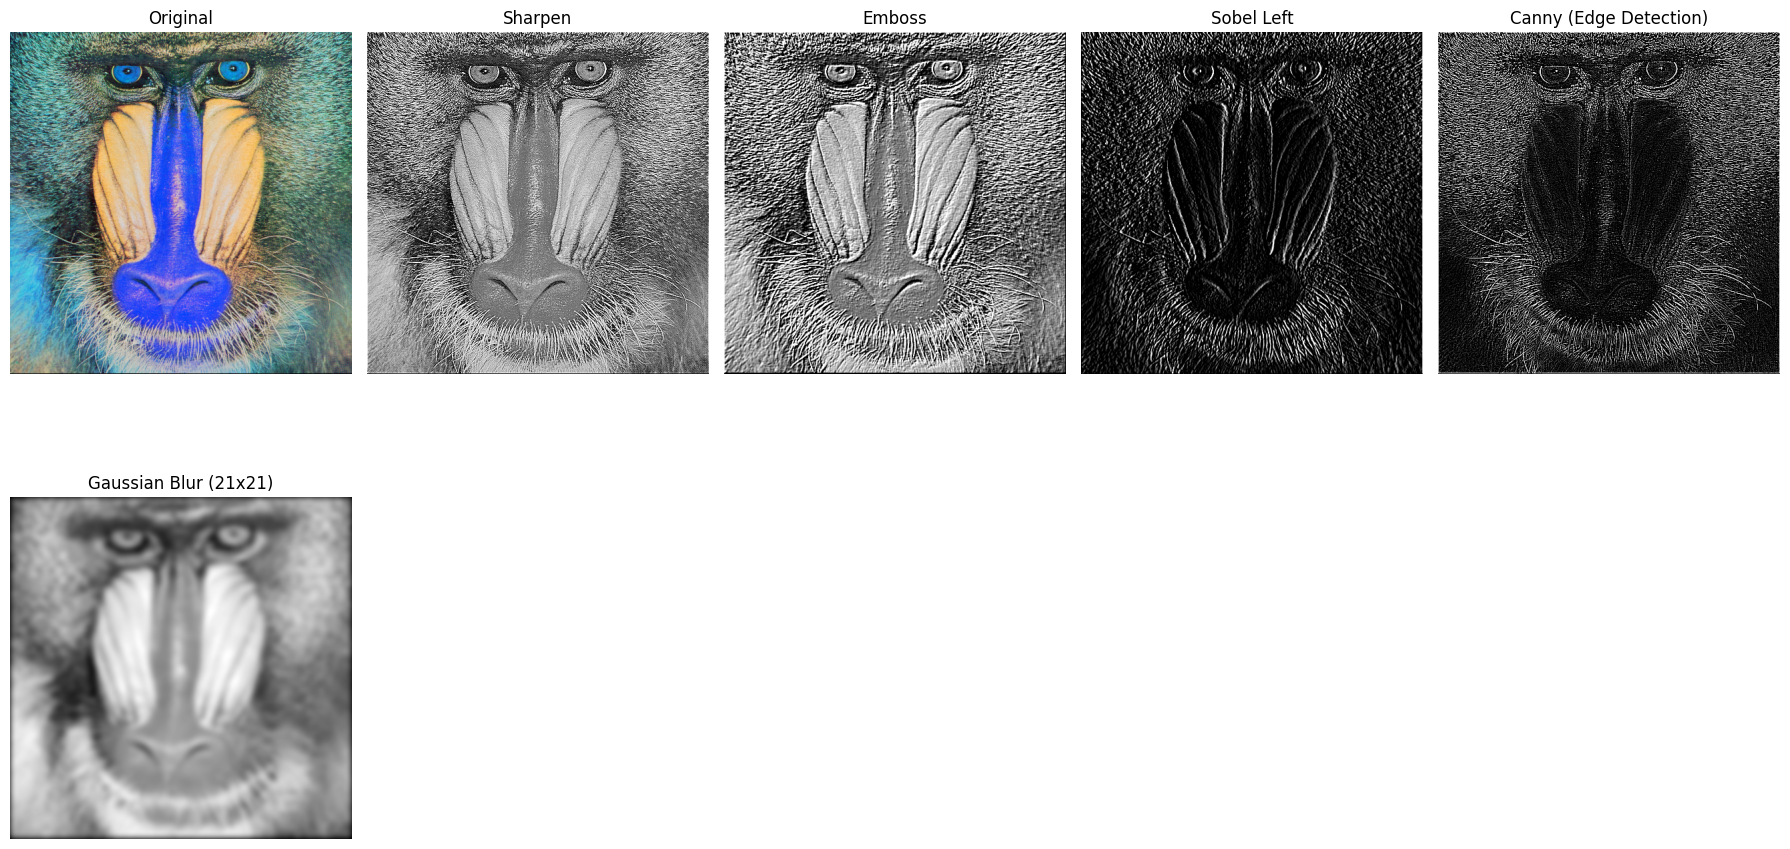

In [49]:
# -------------------------------
# Fungsi konvolusi manual
# -------------------------------
def convolution(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2

    # Padding citra
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Output citra hasil konvolusi
    output = np.zeros_like(img, dtype=np.float32)

    for i in range(img_h):
        for j in range(img_w):
            region = padded_img[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    # Normalisasi supaya tetap dalam 0-255
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)


# -------------------------------
# Load citra (grayscale)
# -------------------------------

img = cv.imread("/content/drive/MyDrive/PCVK/Images/mandrill.tiff")


img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# -------------------------------
# Definisi kernel filter
# -------------------------------

# Sharpen
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Emboss
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

# Sobel Left
sobel_left_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Canny-like kernel
canny_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Gaussian Blur 21x21
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size , sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()


# -------------------------------
# Terapkan filter
# -------------------------------
filters = {
    "Original": img,
    "Sharpen": convolution(img_gray, sharpen_kernel),
    "Emboss": convolution(img_gray, emboss_kernel),
    "Sobel Left": convolution(img_gray, sobel_left_kernel),
    "Canny (Edge Detection)": convolution(img_gray, canny_kernel),
    "Gaussian Blur (21x21)": convolution(img_gray, gauss_kernel)
}

# -------------------------------
# Tampilkan hasil
# -------------------------------
plt.figure(figsize=(18,10)) # Increased figure size to accommodate the new filter
for i, (name, result) in enumerate(filters.items()):
    plt.subplot(2,5,i+1) # Adjusted subplot grid
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis("off")
plt.tight_layout() # Added tight layout for better spacing
plt.show()

## FILTER LIBRARY AND MODERN FILTER

### Experiment 1:
In this first experiment, we'll create Gaussian, Sharpen, and Canny filters using the OpenCV filter2d
library. We'll apply these filters to an RGB image. At the beginning of the code, there's a
show_side_by_side function used to display images side by side.

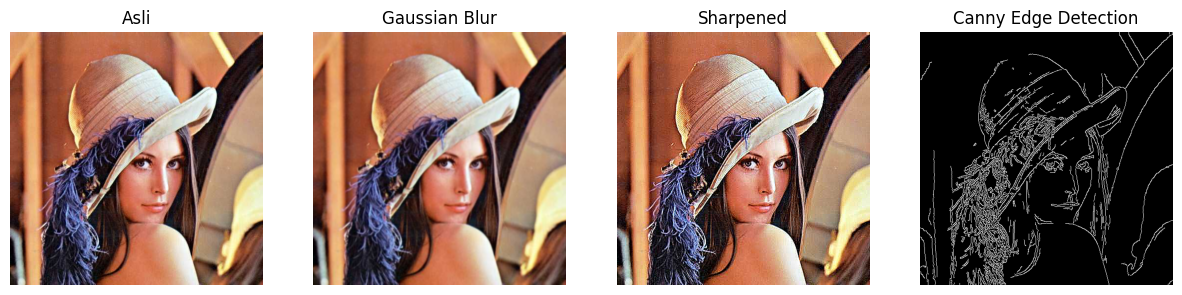

In [50]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2: # grayscale
            plt.subplot(1, len(images), i + 1 )
            plt.imshow(img, cmap="gray")
        else:
            # color
            plt.subplot(1, len(images), i + 1 )
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK/Images/lena.jpg")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

### Experiment 2:
In the following experiment 2, we will implement modern filtering from the OpenCV Library. The
two filters used are Bilateral Filtering and Guided Filtering. Bilateral filtering is a non-linear
filtering method widely used to smooth images while maintaining sharp edges. Unlike
conventional Gaussian blur, which only considers the spatial distance between pixels, bilateral
filtering also considers differences in color intensity. This way, pixels that are close and have
similar colors to the center of the window will receive greater weight in the calculation, while pixels with contrasting colors (for example, at the edges) will have their influence reduced. As a
result, the image becomes smoother in flat areas, while boundaries and important details are
maintained. Although it produces good quality, bilateral filtering is relatively slow due to the
complex weight calculation. In practice, this filter is widely used for purposes such as photo quality
improvement, noise reduction, and as the basis for beauty filters to soften skin texture without
blurring facial contours.
Guided filtering is a more modern and efficient technique. This filter is based on the assumption
that, within a local window, the filtering result can be represented as a linear function of the guide
image . This means that each output pixel is calculated by considering the linear relationship
between the pixel values in the input image and the pixel values in the guide image. If the input
image and the guide image are the same, the guided filter will act similarly to a bilateral filter but
with much faster calculations and smoother results. Another advantage, the guided filter can use
different images as guides, thus being able to direct the filtering process according to needs. Due
to this property, guided filters are often used in various advanced applications such as HDR tone
mapping , detail enhancement, image matting , feathering , and depth map refinement in stereo
vision systems. In general, guided filters offer a balance between good edge preservation, smooth
visual quality, and computational efficiency, and are therefore considered an improvement on the
bilateral filtering approach.

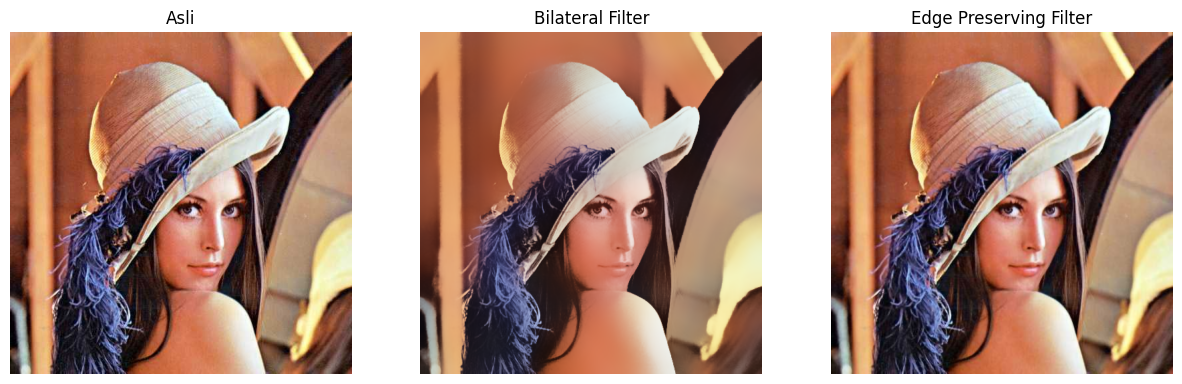

In [51]:
#Filter Modern dari OpenCV
#Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)
#Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=1, sigma_r=0.9 )
show_side_by_side([img, bilateral, edge_preserve],
["Asli", "Bilateral Filter", "Edge Preserving Filter"])

### Experiment 3:
This experiment will examine the filtering process in a CNN (the Feature Map section). Run the
code several times and observe the output. What conclusions can you draw from these results?

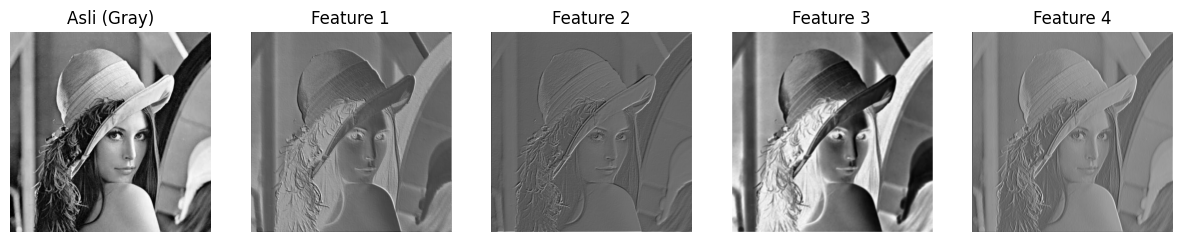

In [53]:
#Filter Feature Map yang digunakan pada CNN, Lakukan running code bagian ini beberapa kali dan perhatikan hastinya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

#Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0)/255.0


#Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

#Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

### Experiment 4:
This experiment will implement the Beauty and Vintage effects commonly used in popular apps.
The filters used are a combination of traditional filters. It's important to note that popular app
filters may not use the same method. Popular apps may use the GenAI model with training data
to provide more accurate results.

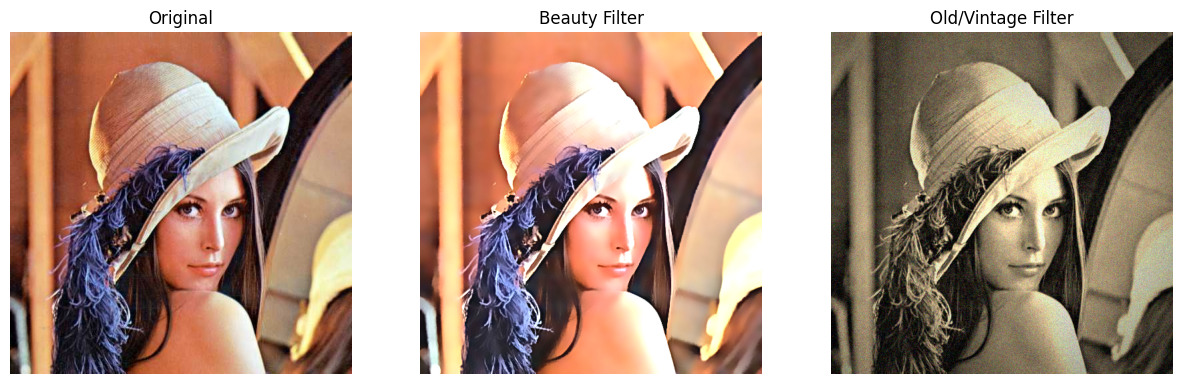

In [58]:
#1. Beauty Filter
#
#Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)
#Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)
#Step 3: Brightness & contrast
alpha = 1.2 # contrast
beta = 15 # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)
#
#2. Old/Vintage Filter
#
#Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131], [0.349, 0.686, 0.168],
[0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)
#Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows * 0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask
# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Display results
show_side_by_side([img, beauty, old_img], ["Original", "Beauty Filter", "Old/Vintage Filter"])

### Experiment 5:
Experiment 5 will show you an anime/cartoon filter using a combination of traditional filters.

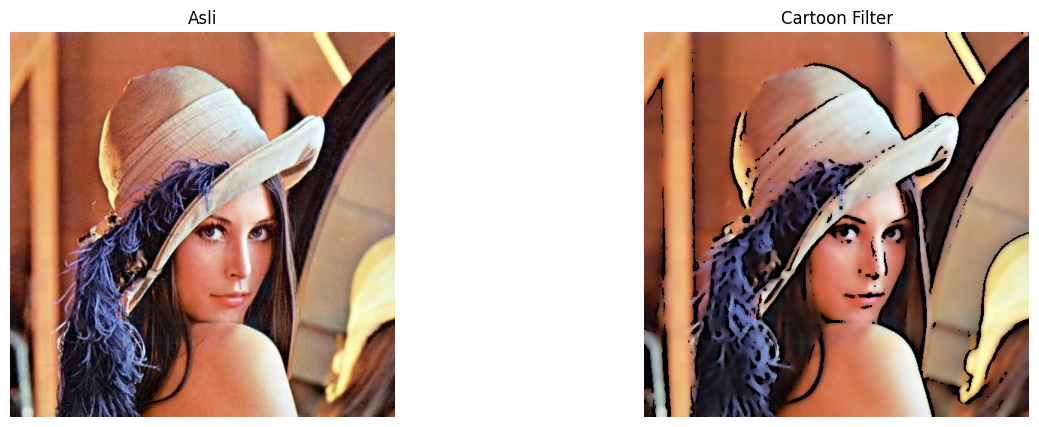

In [60]:
#Filter Anime / Cartoon
#Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
cv.ADAPTIVE_THRESH_MEAN_C,
cv.THRESH_BINARY, 9, 9)
#Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
#Step 3: Gabunghan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)
#Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

### Experiment 6:
In Experiment 6 an example of the Night Filter will be shown.

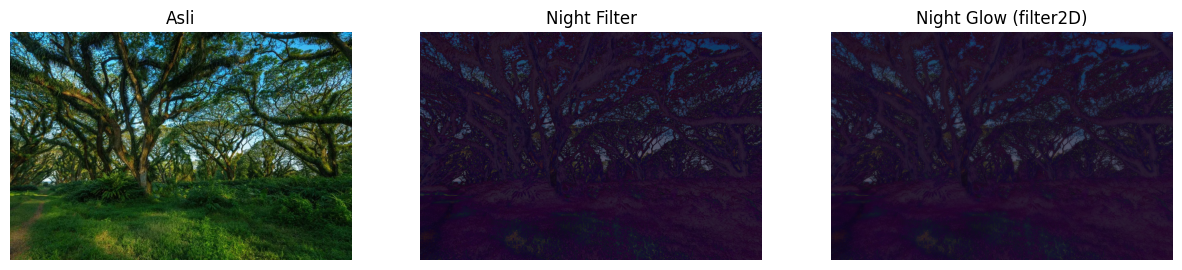

In [67]:
#Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK/Images/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)
#Step 2: Tambah bias biru
blue_tint = np.full_like(night, (100, 8, 58)) # BGR (Adjusted blue tint values to be more noticeable)
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0) # Adjusted weights for blending
#Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel) # Changed depth to -1
#Kombinasikan asli glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)
show_side_by_side([img, night, night_glow],
["Asli", "Night Filter", "Night Glow (filter2D)"])

Experiment 7
Experiment 7 shows the Morning and Morning Filters added with a fog effect.

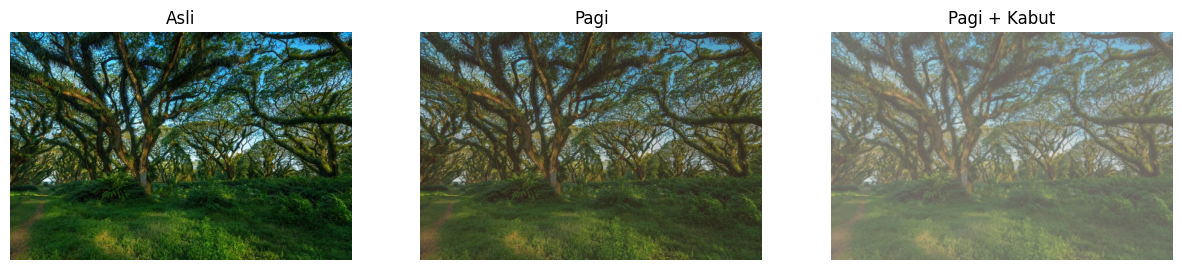

In [68]:
#Filter Suasana pagi dan Kabut
# =
# Step 1: Kurangi kontras & cerahkan
alpha = 0.9
# contrast
beta = 20
# brightness
soft = cv.convertScaleAbs (img, alpha=alpha, beta=beta)
#
# Step 2: Tambahkan warm tone (kemerahan / oranye)
#
warm_tint = np.full_like (soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted (soft, 0.8, warm_tint, 0.2, 0)
# ==
#Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ====
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel (3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D (pagi, -1, kernel)
# tambah Layer putih untuk kabut Lebih nyata
white_layer = np.full_like (pagi, 255)
kabut = cv.addWeighted (kabut, 0.7, white_layer, 0.3, 0)
show_side_by_side([img, pagi, kabut], ["Asli", "Pagi", "Pagi + Kabut"])